In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv")

In [4]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [5]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [6]:
x.shape, y.shape

((387, 5), (387, 1))

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
binary = LinearRegression()

In [9]:
binary.fit(x[[1]], y)

LinearRegression()

In [10]:
binary.coef_

array([[95.52010745]])

In [11]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

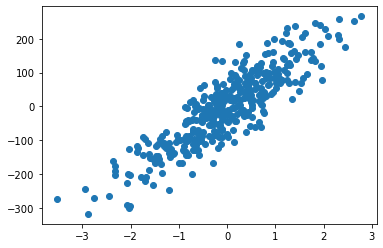

In [12]:
plt.scatter(x[1], y)

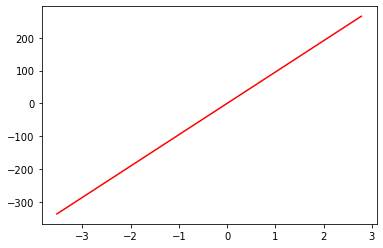

In [13]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [14]:
binary.score(x[[1]], y)

0.7699743283650629

In [15]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

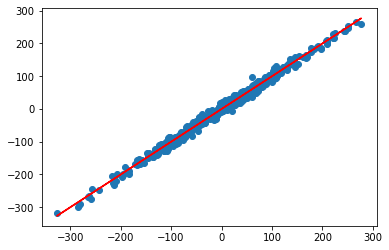

In [16]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

### 1. Сравните коэффициенты парной и множественной регрессии до и после обучения.

In [17]:
multiple = LinearRegression()
#print('Коэффициенты множественной регресси до обучения:', multiple.coef_)
multiple.fit(x, y)
print('Коэффициенты множественной регресси после обучения:', multiple.coef_)

Коэффициенты множественной регресси после обучения: [[15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]]


In [18]:
binary = LinearRegression()
#print('Коэффициенты парной регресси до обучения:', multiple.coef_)
binary.fit(x[[1]], y)
print('Коэффициенты парной регресси после обучения:', binary.coef_)

Коэффициенты парной регресси после обучения: [[95.52010745]]


### 2.Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [19]:
def plot_binary(X, Y):
    binary = LinearRegression()
    binary.fit(X, Y)
    print('Коэффициенты парной регресси после обучения:', binary.coef_)
    print('Score', binary.score(X, Y))
    
    yy = binary.predict(X)
    plt.scatter(yy, Y)
    plt.plot(yy, yy, c='r')

Коэффициенты парной регресси после обучения: [[22.78111342]]
Score 0.04364336234689348


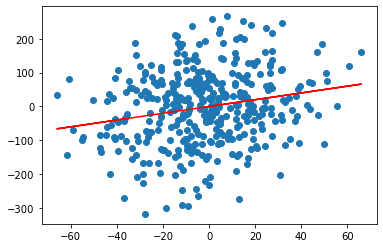

In [20]:
plot_binary(x[[0]], y)

Коэффициенты парной регресси после обучения: [[95.52010745]]
Score 0.7699743283650629


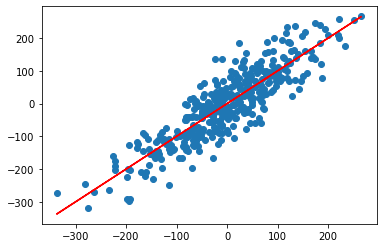

In [21]:
plot_binary(x[[1]], y)

Коэффициенты парной регресси после обучения: [[46.94897635]]
Score 0.18794528514998887


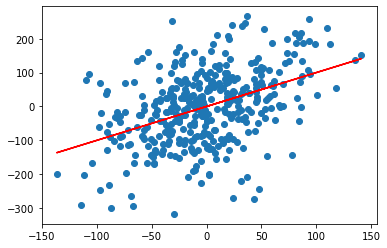

In [22]:
plot_binary(x[[2]], y)

Коэффициенты парной регресси после обучения: [[23.99882407]]
Score 0.047470345664983316


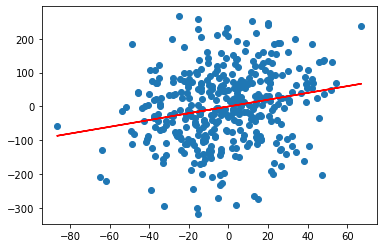

In [23]:
plot_binary(x[[3]], y)

Коэффициенты парной регресси после обучения: [[1.49082042]]
Score 0.00017176151145947838


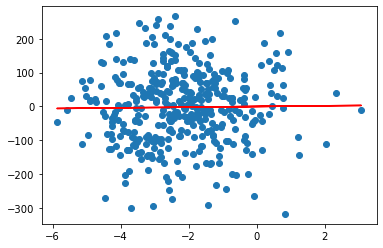

In [24]:
plot_binary(x[[4]], y)

### 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [60]:
from sklearn.preprocessing import PolynomialFeatures

def viz_polynomial(i, plot=True):
    scores = []
    for poly, color  in {2: 'r', 3: 'black', 10: 'b'}.items():
        polynomial = PolynomialFeatures(degree=poly)
        poly_features = polynomial.fit_transform(x[[i]])

        model = LinearRegression()
        model.fit(poly_features, y)
        scores.append(model.score(poly_features, y))
        if plot:
            plt.scatter(x[[i]], y)

            X0 = np.linspace(x[[i]].min(), x[[i]].max(), x[[i]].shape[0])
            Y0 = model.predict(polynomial.fit_transform(X0.reshape(-1, 1)))
            plt.plot(X0, Y0, c=color)
    if not plot:
        return scores

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
def viz_polynomial_test(i, plot=True):
    scores = []
    for poly, color  in {2: 'r', 3: 'black', 10: 'b'}.items():
        polynomial = PolynomialFeatures(degree=poly)
        poly_features = polynomial.fit_transform(x_train[[i]])
        poly_features_test = polynomial.fit_transform(x_test[[i]])

        model = LinearRegression()
        model.fit(poly_features, y_train)
        scores.append(model.score(poly_features_test, y_test))
        if plot:
            plt.scatter(x_train[[i]], y_train)

            X0 = np.linspace(x_test[[i]].min(), x_test[[i]].max(), x_test[[i]].shape[0])
            Y0 = model.predict(polynomial.fit_transform(X0.reshape(-1, 1)))
            plt.plot(X0, Y0, c=color)
    if not plot:
        return scores

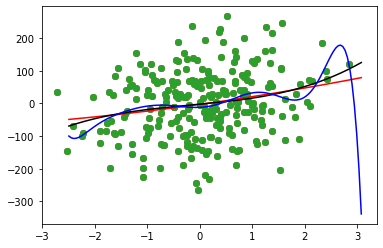

In [72]:
viz_polynomial_test(0)

In [73]:
viz_polynomial_test(0, False)

[0.034267609131666266, 0.026927054610497714, -0.13513490188237287]

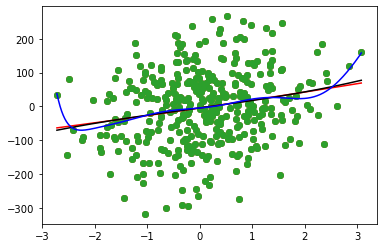

In [66]:
viz_polynomial(0)

In [67]:
viz_polynomial(0,False)

[0.04367170367915507, 0.04376506816920167, 0.05035596325168745]

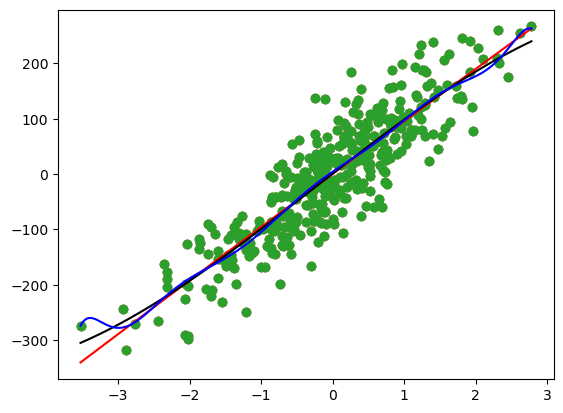

In [56]:
viz_polynomial(1)

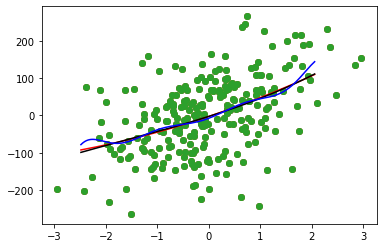

In [31]:
viz_polynomial_test(2)

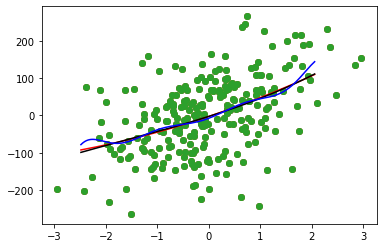

In [32]:
viz_polynomial(2)

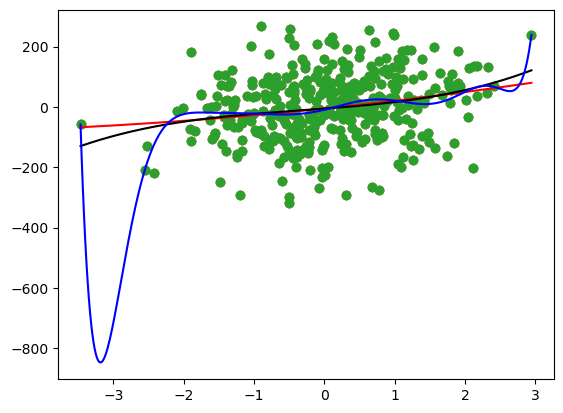

In [58]:
viz_polynomial(3)

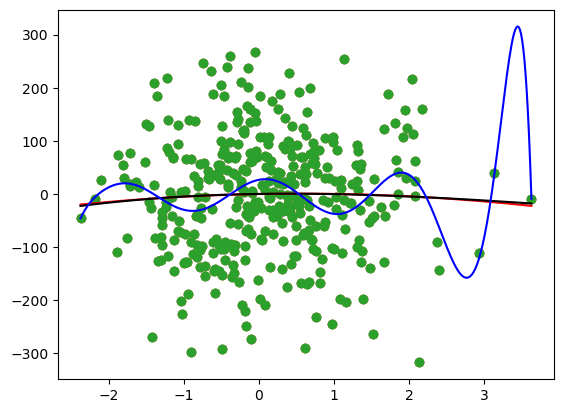

In [59]:
viz_polynomial(4)

### 4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [64]:
viz_polynomial(3, plot=False)

[0.04794250960519941, 0.05031163217811918, 0.07266746559268988]

In [79]:
pd.DataFrame({'0': viz_polynomial(0, plot=False), '1': viz_polynomial(1, plot=False),
              '2': viz_polynomial(2, plot=False), '3': viz_polynomial(3, plot=False),
              '4': viz_polynomial(4, plot=False),}).T.rename({0: "Степень полинома = 2", 1: "Степень полинома = 3", 2: "Степень полинома = 10"}, axis=1)

,Степень полинома = 2,Степень полинома = 3,Степень полинома = 10
0,0.043672,0.043765,0.050356
1,0.769994,0.771118,0.772677
2,0.190008,0.192802,0.204409
3,0.047943,0.050312,0.072667
4,0.001049,0.001065,0.045053


### 5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

#### MSE

In [88]:
from sklearn.metrics import mean_squared_error
def viz_polynomial_mse(i, plot=True):
    scores = []
    for poly, color  in {2: 'r', 3: 'black', 10: 'b'}.items():
        polynomial = PolynomialFeatures(degree=poly)
        poly_features = polynomial.fit_transform(x[[i]])

        model = LinearRegression()
        model.fit(poly_features, y)
        scores.append(mean_squared_error(model.predict(poly_features), y))
        if plot:
            plt.scatter(x[[i]], y)

            X0 = np.linspace(x[[i]].min(), x[[i]].max(), x[[i]].shape[0])
            Y0 = model.predict(polynomial.fit_transform(X0.reshape(-1, 1)))
            plt.plot(X0, Y0, c=color)
    if not plot:
        return scores

In [89]:
pd.DataFrame({'0': viz_polynomial_mse(0, plot=False), '1': viz_polynomial_mse(1, plot=False),
              '2': viz_polynomial_mse(2, plot=False), '3': viz_polynomial_mse(3, plot=False),
              '4': viz_polynomial_mse(4, plot=False),}).T.rename({0: "Степень полинома = 2", 1: "Степень полинома = 3", 2: "Степень полинома = 10"}, axis=1)

,Степень полинома = 2,Степень полинома = 3,Степень полинома = 10
0,11491.909255,11490.787323,11411.586520
1,2763.909753,2750.401156,2731.672893
2,9733.431563,9699.859735,9560.372197
3,11440.588266,11412.119234,11143.475913
4,12004.093016,12003.905964,11475.314939


#### MAE

In [91]:
from sklearn.metrics import mean_absolute_error
def viz_polynomial_mae(i, plot=True):
    scores = []
    for poly, color  in {2: 'r', 3: 'black', 10: 'b'}.items():
        polynomial = PolynomialFeatures(degree=poly)
        poly_features = polynomial.fit_transform(x[[i]])

        model = LinearRegression()
        model.fit(poly_features, y)
        scores.append(mean_absolute_error(model.predict(poly_features), y))
        if plot:
            plt.scatter(x[[i]], y)

            X0 = np.linspace(x[[i]].min(), x[[i]].max(), x[[i]].shape[0])
            Y0 = model.predict(polynomial.fit_transform(X0.reshape(-1, 1)))
            plt.plot(X0, Y0, c=color)
    if not plot:
        return scores

In [92]:
pd.DataFrame({'0': viz_polynomial_mae(0, plot=False), '1': viz_polynomial_mae(1, plot=False),
              '2': viz_polynomial_mae(2, plot=False), '3': viz_polynomial_mae(3, plot=False),
              '4': viz_polynomial_mae(4, plot=False),}).T.rename({0: "Степень полинома = 2", 1: "Степень полинома = 3", 2: "Степень полинома = 10"}, axis=1)

,Степень полинома = 2,Степень полинома = 3,Степень полинома = 10
0,85.778988,85.684404,84.854224
1,42.132303,42.061248,41.690871
2,77.458415,77.570200,76.815422
3,83.446884,83.444329,82.134261
4,87.232040,87.223572,84.796000


#### RMSE

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def viz_polynomial_rmse(i, plot=True):
    scores = []
    for poly, color  in {2: 'r', 3: 'black', 10: 'b'}.items():
        polynomial = PolynomialFeatures(degree=poly)
        poly_features = polynomial.fit_transform(x[[i]])

        model = LinearRegression()
        model.fit(poly_features, y)
        scores.append(sqrt(mean_squared_error(model.predict(poly_features), y)))
        if plot:
            plt.scatter(x[[i]], y)

            X0 = np.linspace(x[[i]].min(), x[[i]].max(), x[[i]].shape[0])
            Y0 = model.predict(polynomial.fit_transform(X0.reshape(-1, 1)))
            plt.plot(X0, Y0, c=color)
    if not plot:
        return scores

In [97]:
pd.DataFrame({'0': viz_polynomial_rmse(0, plot=False), '1': viz_polynomial_rmse(1, plot=False),
              '2': viz_polynomial_rmse(2, plot=False), '3': viz_polynomial_rmse(3, plot=False),
              '4': viz_polynomial_rmse(4, plot=False),}).T.rename({0: "Степень полинома = 2", 1: "Степень полинома = 3", 2: "Степень полинома = 10"}, axis=1)

,Степень полинома = 2,Степень полинома = 3,Степень полинома = 10
0,107.200323,107.195090,106.825028
1,52.572899,52.444267,52.265408
2,98.658155,98.487866,97.777156
3,106.960686,106.827521,105.562663
4,109.563192,109.562338,107.122896


### 6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [123]:
%%timeit
polynomial = PolynomialFeatures(degree=2)
poly_features = polynomial.fit_transform(x[[1]])

model = LinearRegression()
model.fit(poly_features, y)
#model.score(poly_features, y)

3.05 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [124]:
%%timeit
polynomial = PolynomialFeatures(degree=3)
poly_features = polynomial.fit_transform(x[[0]])

model = LinearRegression()
model.fit(poly_features, y)
#model.score(poly_features, y)

3.09 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [125]:
%%timeit
polynomial = PolynomialFeatures(degree=10)
poly_features = polynomial.fit_transform(x[[0]])

model = LinearRegression()
model.fit(poly_features, y)
#model.score(poly_features, y)

3.27 ms ± 308 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Вывод: с увеличением степени полинома, время обучения возрастает (но на наших данных возрастает незначительно)